In [1]:
## Notebook of Topshe
%matplotlib inline
# Importing necessary librareis
from scipy.ndimage import imread
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.color import rgb2gray
import matplotlib.patches as patches
import numpy as np
from PIL import Image
import math
from skimage import io, filters, draw

# Image Path
image_path = "./BengaliBMP/"
# Image count
image_count = 6000

# Plotting image inline
%matplotlib inline

# Image collection
images = [image_path + 'bn' + str(num).zfill(5) + '.bmp' for num in range(image_count)]

In [2]:
# Returns the path of all images of a given digit
def load_digit(digit, ip=image_path, ic=image_count):
    return [ip + 'bn' + str(num).zfill(5) + '.bmp' for num in range(ic) if str(num)[-1] == str(digit)]

In [3]:
# Plots histogram of a given digit
def plot_hist(digit, index):
    data = rgb2gray(mpimg.imread(load_digit(digit)[index])).ravel()
    plt.hist(data, alpha=0.5)
    plt.title("Histogram of " + str(digit) + " at index: " + str(index))
    plt.xlabel("Pixel Value")
    plt.ylabel("Count")
    plt.show()

# Returns the pixel count by category
def pixel_count(digit, index):
    # Reading an image, squishing the multidimensional array into single dimension
    data = rgb2gray(mpimg.imread(load_digit(digit)[index])).ravel()
    ones =  [i for i in data if i == 1]
    zeros = [i for i in data if i == 0]
    value_dict = {
        "white_count" : len(ones),
        "black_count" : len(zeros)
    }
    return value_dict

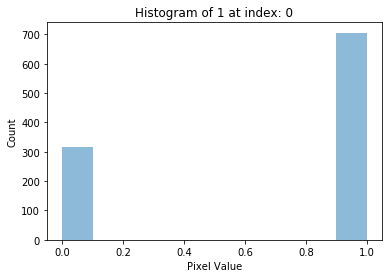

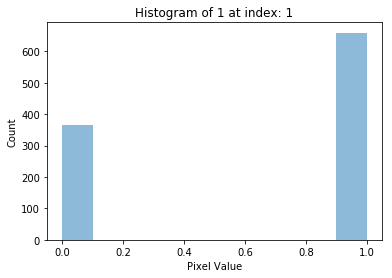

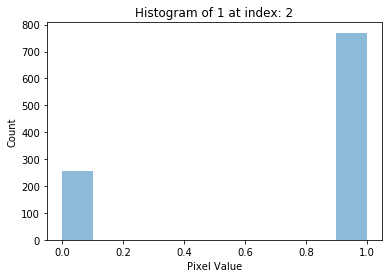

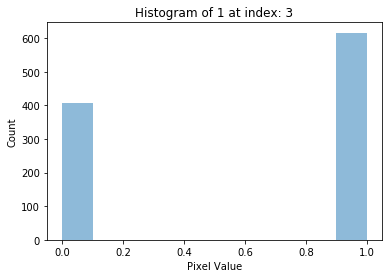

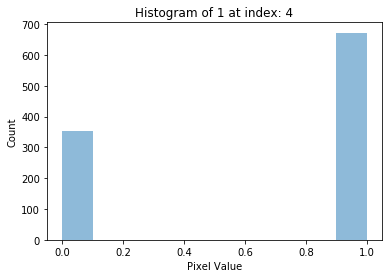

In [4]:
for i in range(5):
    plot_hist(1, i)

In [5]:
# Plotting histogram of five instances of digit 1


In [6]:
# Comparing between two digits [applying basic statistics]
one_black_pixels = []
one_white_pixels = []

two_black_pixels = []
two_white_pixels = []

for i in range(100):
    one_black_pixels.append(pixel_count(1, i)['black_count'])
    one_white_pixels.append(pixel_count(1, i)['white_count'])
    
    two_black_pixels.append(pixel_count(2, i)['black_count'])
    two_white_pixels.append(pixel_count(2, i)['white_count'])
    
# Calculating the mean
one_black_pixel_mean = np.mean(one_black_pixels)
one_white_pixel_mean = np.mean(one_white_pixels)

two_black_pixel_mean = np.mean(two_black_pixels)
two_white_pixel_mean = np.mean(two_white_pixels)

print("1 [white] : {0}\n1 [black] : {1}".format(one_white_pixel_mean,
                                                one_black_pixel_mean
                                               ))
print(" -- ")
print("2 [white] : {0}\n2 [black] : {1}".format(two_white_pixel_mean,
                                                two_black_pixel_mean
                                               ))

1 [white] : 646.16
1 [black] : 377.84
 -- 
2 [white] : 726.47
2 [black] : 297.53


In [7]:
# Finding out difference between white count between 1 and 2
values = []
for i in range(50):
    values.append(abs(pixel_count(1, i)['white_count'] - pixel_count(2, i)['white_count']))
    ## If checking is needed
    #print(values[i])

In [8]:
# Maximum and minimum of the collected difference
print ("Minimum: {0}".format(np.min(values)))
print ("Maximum: {0}".format(np.max(values)))

Minimum: 6
Maximum: 335


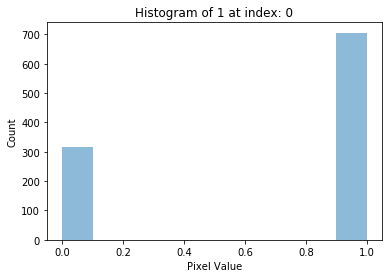

In [9]:
plot_hist(1, 0)

## Applying Convolution 

In [10]:
one_1 = load_digit(1)[0]
one_2 = load_digit(1)[1]
two_1 = load_digit(2)[0]
two_2 = load_digit(2)[1]

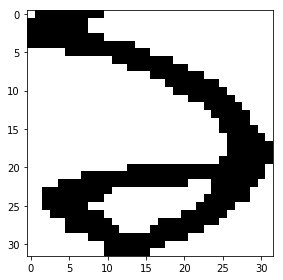

In [11]:
io.imshow(one_1)

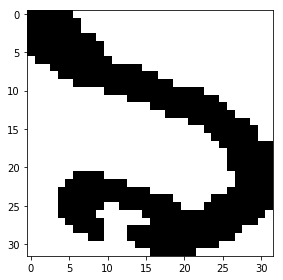

In [12]:
io.imshow(one_2)

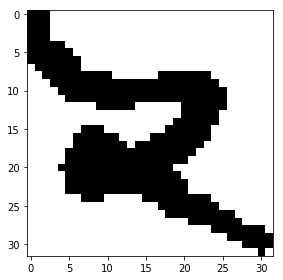

In [13]:
io.imshow(two_1)

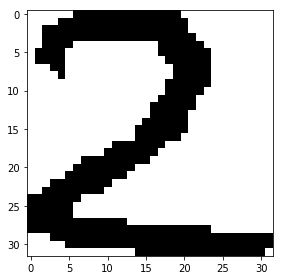

In [14]:
io.imshow(two_2)

In [15]:
one_array = np.array(Image.open(load_digit(1)[0]), dtype=np.uint8)

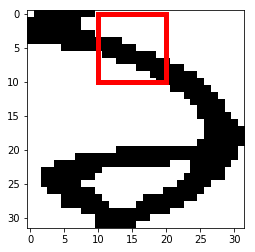

In [16]:
fig, ax = plt.subplots(1)
ax.imshow(one_array)
rect = patches.Rectangle((10,0),10,10,linewidth=5,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()

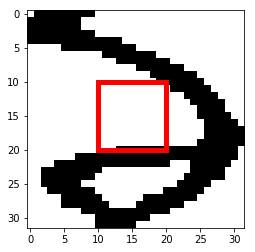

In [64]:
fig, ax = plt.subplots(1)
ax.imshow(one_array)
rect = patches.Rectangle((10,10),10,10,linewidth=5,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()

Patch Coordinates: 0, 0


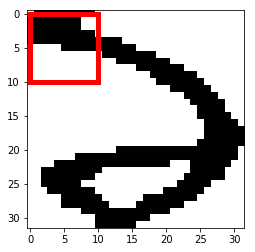

Patch Coordinates: 0, 1


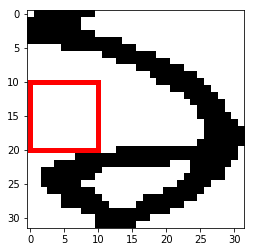

Patch Coordinates: 0, 2


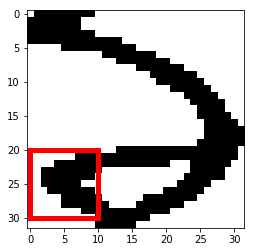

Patch Coordinates: 1, 0


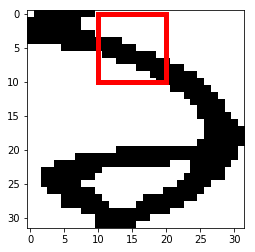

Patch Coordinates: 1, 1


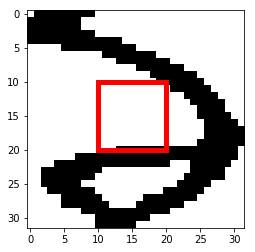

Patch Coordinates: 1, 2


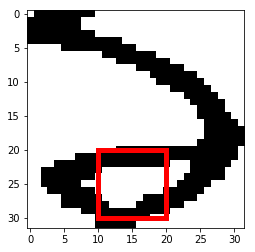

Patch Coordinates: 2, 0


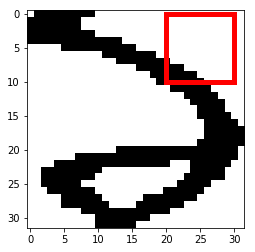

Patch Coordinates: 2, 1


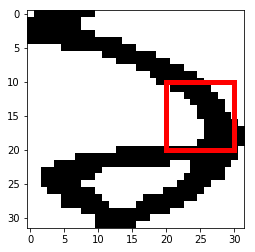

Patch Coordinates: 2, 2


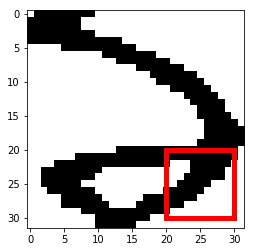

In [55]:
# Getting region of interest [ROI]
height = math.floor(32/3)
width = math.floor(32/3)
    
for i in range(3):
    for j in range(3):
        fig, ax = plt.subplots(1)
        ax.imshow(one_array)
        print("Patch Coordinates: {}, {}".format(i, j))
        rect = patches.Rectangle((height * i, width * j), height, width, linewidth=5, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        plt.show()

In [73]:
def draw_roi(digit, index):
    image_array = np.array(Image.open(load_digit(digit)[index]), dtype=np.uint8)
    height = math.floor(32/3)
    width = math.floor(32/3)

    for i in range(3):
        for j in range(3):
            fig, ax = plt.subplots(1)
            ax.imshow(image_array)
            print("Patch Coordinates: {}, {}".format(j, i))
            rect = patches.Rectangle((height * i, width * j), height, width, linewidth=5, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            plt.show()

Patch Coordinates: 0, 0


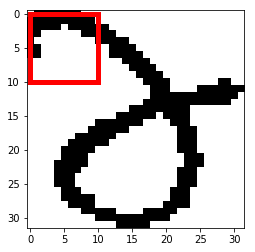

Patch Coordinates: 1, 0


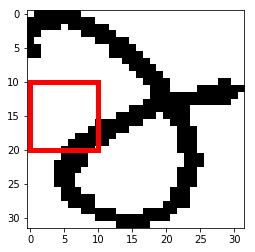

Patch Coordinates: 2, 0


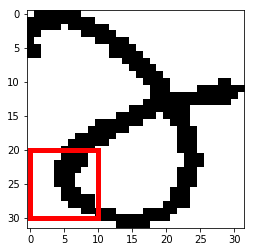

Patch Coordinates: 0, 1


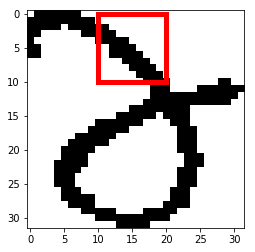

Patch Coordinates: 1, 1


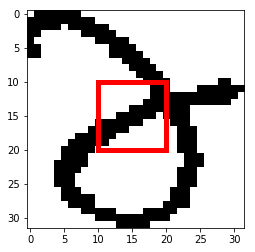

Patch Coordinates: 2, 1


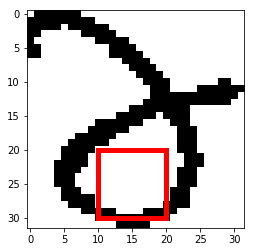

Patch Coordinates: 0, 2


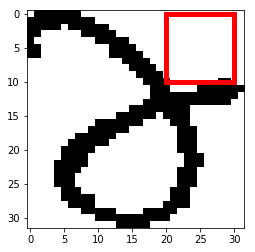

Patch Coordinates: 1, 2


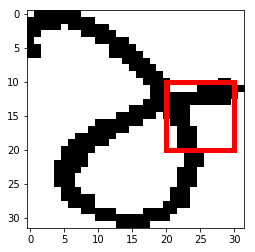

Patch Coordinates: 2, 2


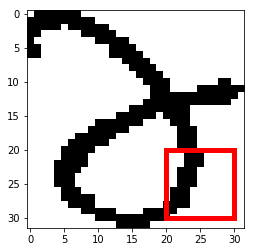

In [74]:
draw_roi(1, 2)

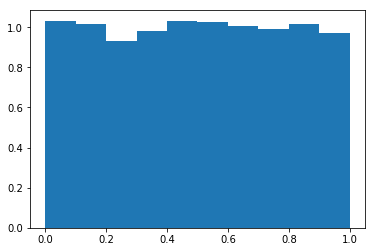

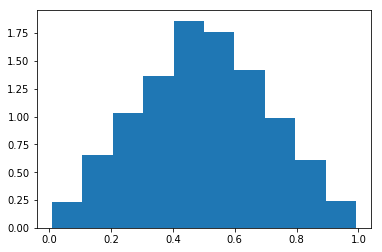

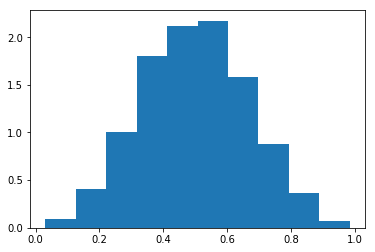

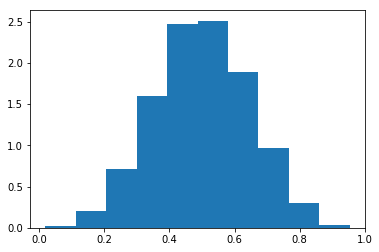

In [89]:
import numpy as np
import matplotlib.pyplot as plt

for N in range(1,5):
    u_ = np.random.uniform(0.,1.,(10000,N))
    mean_ = np.mean(u_,axis=1)

    plt.figure()
    plt.hist(mean_,bins=10, normed=True)
    plt.show()

(10000, 2)


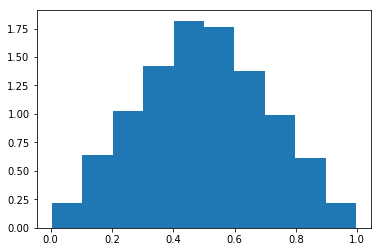

In [106]:
N = 2
number_of_students = 10000

u_ = np.random.uniform(0.,1.,(number_of_students,N))
mean_ = np.mean(u_,axis=1)

print (u_.shape)

plt.figure()
plt.hist(mean_,bins=10, normed=True)
plt.show()

(10000, 1000)


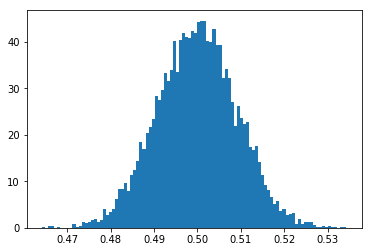

In [108]:
N = 1000
number_of_students = 10000

u_ = np.random.uniform(0.,1.,(number_of_students,N))
mean_ = np.mean(u_,axis=1)

print (u_.shape)

plt.figure()
plt.hist(mean_,bins=100, normed=True)
plt.show()